# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
print(study_data_complete.shape)
study_data_complete.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
# Checking the number of mice.
total_mice = len(study_data_complete['Mouse ID'].unique())
print(f'Number of mice in all the treatment regimens is: {total_mice}')

Number of mice in all the treatment regimens is: 249


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_mice_IDs = study_data_complete.loc[duplicated_mice, 'Mouse ID'].unique()
print(duplicated_mice_IDs)

['g989']


In [13]:
bad_mouse_filter_series = study_data_complete['Mouse ID'].isin(duplicated_mice_IDs)
bad_mouse_filter_series

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = study_data_complete.loc[bad_mouse_filter_series]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
~bad_mouse_filter_series

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=study_data_complete.loc[~bad_mouse_filter_series]
print(clean_df.shape)
clean_df.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [17]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

In [18]:
print(clean_df.shape)

(1880, 8)


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = study_results['Tumor Volume (mm3)'].mean()
median = study_results['Tumor Volume (mm3)'].median()
var = study_results['Tumor Volume (mm3)'].var()
std = study_results['Tumor Volume (mm3)'].std()
sem = study_results['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({
    'Mean': [mean],
    'Media': [median],
    'Variance': [var],
    'Standard deviation':[std],
    'SEM': [sem]
})
print('Method I')
summary_statistics_df


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

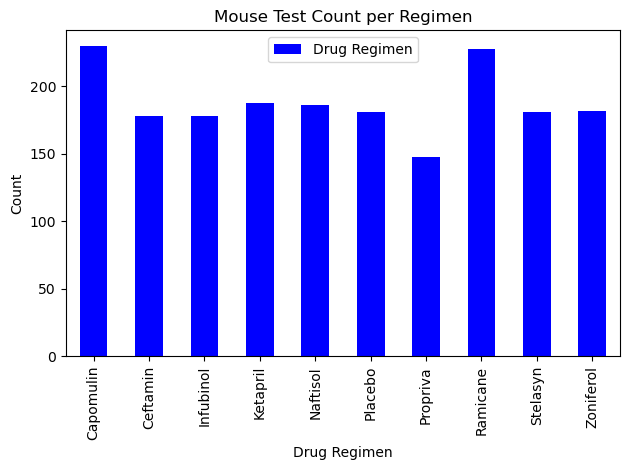

In [66]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimengrouping = clean_df.groupby('Drug Regimen')
regimen_group_count = pd.DataFrame(regimengrouping['Drug Regimen'].count())
pandasplot = regimen_group_count.plot(kind='bar', title='Mouse Test Count per Regimen',color='blue')
pandasplot.set_xlabel('Drug Regimen')
pandasplot.set_ylabel('Count')
plt.tight_layout()
plt.show()



In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [37]:
drug_count_s = clean_df.groupby('Drug Regimen').count()['Timepoint']
drug_count_s 

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [39]:
drug_count_s.values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

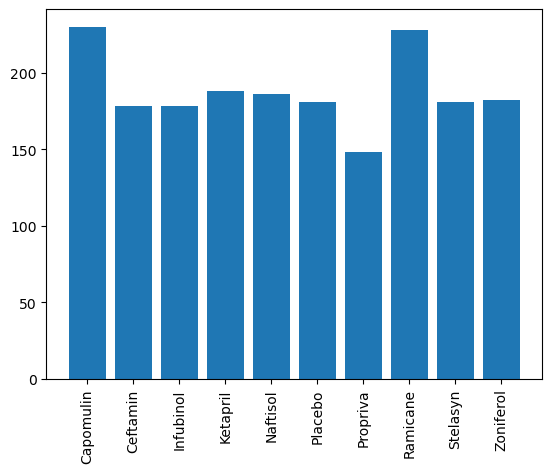

In [44]:
plt.bar(drug_count_s.index, drug_count_s.values)
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_study_data_complete.Sex.value_counts()
counts_value_counts = counts["Male"] + counts["Female"]
counts_unqiue = str(len(clean_study_data_complete["Mouse ID"].unique()))
print(f"value_count rows: {counts_value_counts} \nUnique rows: {counts_unqiue}")



<Axes: ylabel='count'>

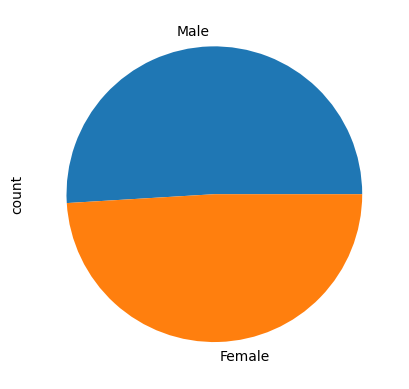

In [54]:
clean_df['Sex'].value_counts().plot.pie()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_id_grouped_df = clean_df.groupby("Mouse ID")
last_timepoint = mouse_id_grouped_df["Timepoint"].max()
last_timepoint - last_timepoint.reset_index()


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_volume = pd.merge(last_timepoint,clean_df,on=['Mouse ID','Timepoint'],how='left')
last_timepoint_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

final_tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
   
    # Determining outliers using upper and lower bounds

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


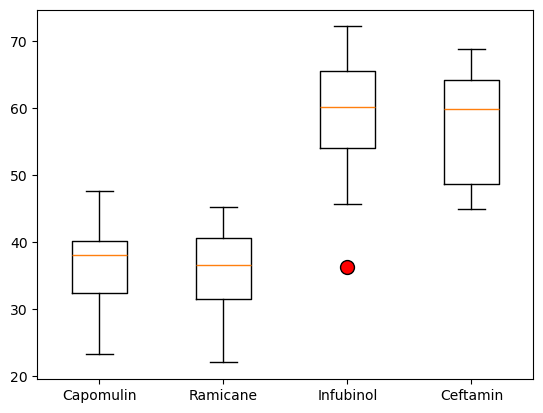

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume for Mouse b742 | Treatment: Capomulin')

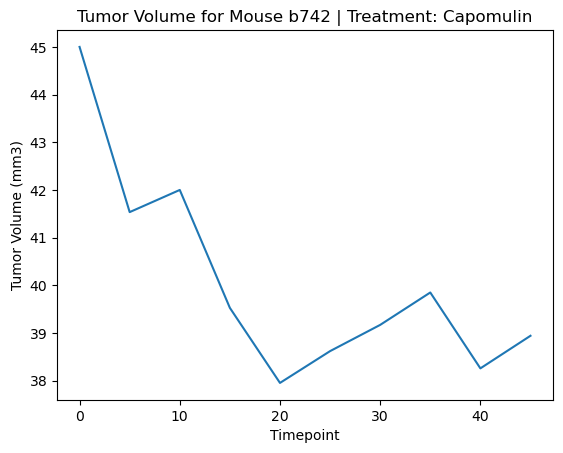

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_b742 = clean_df[clean_df['Mouse ID'] == 'b742']
plt.plot(mouse_b742['Timepoint'],mouse_b742['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for Mouse b742 | Treatment: Capomulin')

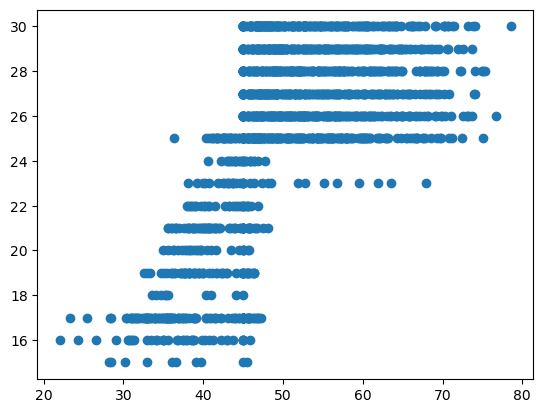

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(clean_df['Tumor Volume (mm3)'], clean_df['Weight (g)'])

## Correlation and Regression

In [90]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(['Weight (g)'],['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

ValueError: x and y must have length at least 2.